In [50]:
import pandas as pd
#.venv\Scripts\activate.bat 
df = pd.read_csv('./londonWithoutNoise.csv')
df

,accidentIndex,accidentYear,accidentReference,locationEasting,locationNorthing,longitude,latitude,PoliceForceDescription,AccidentSeverityDescription,numVehicles,...,PoliceAttendanceDescription,TrunkRoadDescription,lsoaOfAccident,tavg,prcp,snow,wspd,rad_lng,rad_lat,cluster
0,2020430390553,2020,430390553,455547,207474,-1.196513,51.763207,Thames Valley,Slight,4,...,Yes,Non-trunk,E01028513,5.700000,0.3,0,8.100000,-0.020883,0.903438,237
1,2021010342279,2021,010342279,527425,175462,-0.167045,51.463795,Metropolitan Police,Slight,2,...,Yes,Non-trunk,E01004551,8.400000,0.0,0,16.900000,-0.002915,0.898213,339
2,2021010342290,2021,010342290,531922,178986,-0.101031,51.494435,Metropolitan Police,Slight,1,...,Yes,Non-trunk,E01003933,8.400000,0.0,0,16.900000,-0.001763,0.898747,0
3,2021010342354,2021,010342354,526945,177494,-0.173222,51.482164,Metropolitan Police,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01002840,8.400000,0.0,0,16.900000,-0.003023,0.898533,1
4,2021010342371,2021,010342371,532503,178971,-0.092673,51.494164,Metropolitan Police,Fatal,3,...,Yes,Non-trunk,E01032720,8.400000,0.0,0,16.900000,-0.001617,0.898743,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,2020430248650,2020,430248650,455501,207452,-1.197183,51.763014,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028513,23.400000,0.0,0,16.600000,-0.020895,0.903435,237
42069,2020430282223,2020,430282223,455498,207454,-1.197226,51.763032,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028513,13.900000,0.0,0,12.000000,-0.020896,0.903435,237
42070,2020430287872,2020,430287872,455560,207441,-1.196330,51.762909,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028574,16.700001,0.0,0,13.200000,-0.020880,0.903433,237
42071,2020430314906,2020,430314906,452263,205967,-1.244320,51.749974,Thames Valley,Slight,2,...,No - accident was reported using a self comple...,Non-trunk,E01028588,9.500000,30.5,0,19.799999,-0.021717,0.903207,208


In [51]:
#filter the slight accidents 
filter_slight = df['AccidentSeverityDescription'] == 'Slight'
slight_series = df.where(filter_slight).groupby(['accidentDate', 'accidentYear', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_slight_accidents')
#reset index to align dataframe
slight_df = pd.DataFrame(slight_series).reset_index()
#sort the dataframe to make it more readable
slight_df.sort_values(by=['accidentDate'], ascending=True).head(10)


,accidentDate,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_slight_accidents
0,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,105.0,1
1,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,215.0,1
2,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,240.0,1
3,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,267.0,1
4,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,283.0,1
5,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,297.0,1
6,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,104.0,1
7,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,123.0,1
8,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,255.0,1
12,2009-01-03,2009.0,Saturday,1.4,0.0,0.0,5.7,130.0,1


In [3]:
Slight = len(slight_df[slight_df['accidentYear']==2021])
Slight

2278

In [52]:
#filter the Serious accidents
filter_serious = df['AccidentSeverityDescription'] == 'Serious'
serious_series = df.where(filter_serious).groupby(['accidentDate', 'accidentYear', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_serious_accidents')
#reset index to align dataframe
serious_df = pd.DataFrame(serious_series).reset_index()
#sort the dataframe to make it more readable
serious_df.sort_values(by=['accidentDate'], ascending=True).head(10)

,accidentDate,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents
0,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.100000,129.0,1
1,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.100000,226.0,1
2,2009-01-03,2009.0,Saturday,1.4,0.0,0.0,5.700000,0.0,1
3,2009-01-03,2009.0,Saturday,1.4,0.0,0.0,5.700000,85.0,1
4,2009-01-04,2009.0,Sunday,0.2,0.0,0.0,5.200000,9.0,1
5,2009-01-06,2009.0,Tuesday,-0.3,1.3,0.0,11.100000,1.0,1
6,2009-01-06,2009.0,Tuesday,-0.3,1.3,0.0,11.100000,45.0,1
7,2009-01-07,2009.0,Wednesday,1.2,0.0,0.0,5.600000,168.0,1
8,2009-01-08,2009.0,Thursday,3.6,0.0,0.0,3.800000,243.0,1
9,2009-01-11,2009.0,Sunday,6.5,0.3,0.0,19.200001,163.0,1


In [187]:
SeriousTotal = len(serious_df[serious_df['accidentYear']==2021])
SeriousTotal

392

In [53]:
#filter the fatal accidents
filter_fatal = df['AccidentSeverityDescription'] == 'Fatal'
fatal_series = df.where(filter_fatal).groupby(['accidentDate', 'accidentYear', 'DayOfWeekDescription',  'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_fatal_accidents')
#reset index to align dataframe
fatal_df = pd.DataFrame(fatal_series).reset_index()
#sort the dataframe to make it more readable
fatal_df.sort_values(by=['accidentDate'], ascending=True).head(10)

,accidentDate,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_fatal_accidents
0,2009-01-05,2009.0,Monday,1.500000,0.0,0.0,16.299999,107.0,1
1,2009-02-04,2009.0,Wednesday,2.900000,5.1,20.0,14.400000,218.0,1
2,2009-02-08,2009.0,Sunday,3.600000,0.5,0.0,8.800000,114.0,1
3,2009-03-21,2009.0,Saturday,9.600000,0.0,0.0,9.300000,225.0,1
4,2009-04-08,2009.0,Wednesday,12.100000,1.8,0.0,22.400000,0.0,1
5,2009-04-09,2009.0,Thursday,13.100000,0.0,0.0,15.800000,230.0,1
6,2009-04-12,2009.0,Sunday,11.400000,3.3,0.0,7.500000,130.0,1
7,2009-05-15,2009.0,Friday,13.800000,10.7,0.0,15.700000,274.0,1
8,2009-06-12,2009.0,Friday,16.500000,0.0,0.0,5.900000,175.0,1
9,2009-06-25,2009.0,Thursday,19.200001,0.0,0.0,18.700001,273.0,1


In [186]:
fatalTotal = len(fatal_df[fatal_df['accidentYear']==2021])
fatalTotal

9

In [54]:
merged_df = pd.merge(serious_df, slight_df, how='outer').sort_values(by=['accidentDate'], ascending=True)
merged_df.head(10)

,accidentDate,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents
0,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,129.0,1.0,NaN
4715,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,297.0,NaN,1.0
4714,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,283.0,NaN,1.0
4713,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,267.0,NaN,1.0
4711,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,215.0,NaN,1.0
4710,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,105.0,NaN,1.0
4712,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,240.0,NaN,1.0
1,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,226.0,1.0,NaN
4716,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,104.0,NaN,1.0
4717,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,123.0,NaN,1.0


In [55]:
accidents_df = pd.merge(merged_df, fatal_df, how='outer').sort_values(by=['accidentDate'], ascending=True)
accidents_df.head(10)

,accidentDate,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,129.0,1.0,NaN,NaN
1,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,297.0,NaN,1.0,NaN
2,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,283.0,NaN,1.0,NaN
3,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,267.0,NaN,1.0,NaN
4,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,215.0,NaN,1.0,NaN
5,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,105.0,NaN,1.0,NaN
6,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,240.0,NaN,1.0,NaN
7,2009-01-01,2009.0,Thursday,3.1,0.0,0.0,8.1,226.0,1.0,NaN,NaN
8,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,104.0,NaN,1.0,NaN
9,2009-01-02,2009.0,Friday,3.7,0.0,0.0,11.4,123.0,NaN,1.0,NaN


In [56]:
#fill the NaN accident values with 0 and set the number to a int32
accidents_df['number_serious_accidents'].fillna(value=0, inplace=True)
accidents_df['number_serious_accidents'] = accidents_df['number_serious_accidents'].astype('int32')
accidents_df['number_slight_accidents'].fillna(value=0, inplace=True)
accidents_df['number_slight_accidents'] = accidents_df['number_slight_accidents'].astype('int32')
accidents_df['number_fatal_accidents'].fillna(value=0, inplace=True)
accidents_df['number_fatal_accidents'] = accidents_df['number_fatal_accidents'].astype('int32')

In [57]:
new_df = accidents_df.drop(['accidentDate'], axis=1)
new_df

,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,2009.0,Thursday,3.1,0.0,0.0,8.100000,129.0,1,0,0
1,2009.0,Thursday,3.1,0.0,0.0,8.100000,297.0,0,1,0
2,2009.0,Thursday,3.1,0.0,0.0,8.100000,283.0,0,1,0
3,2009.0,Thursday,3.1,0.0,0.0,8.100000,267.0,0,1,0
4,2009.0,Thursday,3.1,0.0,0.0,8.100000,215.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
41177,2021.0,Thursday,13.1,1.8,0.0,24.200001,232.0,0,1,0
41178,2021.0,Thursday,13.1,1.8,0.0,24.200001,350.0,0,1,0
41179,2021.0,Friday,12.2,0.0,0.0,20.400000,77.0,0,1,0
41180,2021.0,Friday,12.2,0.0,0.0,20.400000,262.0,1,0,0


In [10]:
import numpy as np
neg, pos = np.bincount(new_df['number_fatal_accidents'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 41368
    Positive: 191 (0.46% of total)



In [58]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#prepare the training test splitting 
#as this is a multi output
y = new_df[['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents']]
X = new_df.drop(['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=11)

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#prepare the data for the pipeline by one hot encoding the categorical values
enc = OneHotEncoder()
Values = [['Monday', 0], ['Tuesday', 1], ['Wednesday', 2], ['Thursday', 3], ['Friday', 4], ['Saturday', 5], ['Sunday', 6]  ]
enc.fit(Values)

#build preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', enc, ['DayOfWeekDescription'])
    ], remainder ='passthrough'
)

#fit the preporcessing column transformer
result = preprocessor.fit_transform(X)
result = pd.DataFrame(result)

#rename by index
result = result.rename(columns ={result.columns[0]: 'col_0_Monday', result.columns[1]: 'col_1_Tuesday', result.columns[2]: 'col_2_Wednesday', 
                        result.columns[3]: 'col_3_Thursday', result.columns[4]: 'col_4_Friday', result.columns[5]: 'col_5_Saturday', 
                        result.columns[6]: 'col_6_Sunday' })
result

,col_0_Monday,col_1_Tuesday,col_2_Wednesday,col_3_Thursday,col_4_Friday,col_5_Saturday,col_6_Sunday,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009.0,3.1,0.0,0.0,8.100000,129.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009.0,3.1,0.0,0.0,8.100000,297.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009.0,3.1,0.0,0.0,8.100000,283.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009.0,3.1,0.0,0.0,8.100000,267.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009.0,3.1,0.0,0.0,8.100000,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021.0,13.1,1.8,0.0,24.200001,232.0
41364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021.0,13.1,1.8,0.0,24.200001,350.0
41365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,12.2,0.0,0.0,20.400000,77.0
41366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,12.2,0.0,0.0,20.400000,262.0


In [60]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

#Data set is not very large, containing 33262 rows, so we need to set an appropriate min_data_in_leaf, lets try 1000
#to get better accuracy use a large number of leaves, be careful as this can cause overfitting, the default is 31
#Use large max_bin (may be slower) deafult is 255
#lower the default learning rate (0.1) and increase the default number of iterations (100) to get better accuracy
#Try dart (Dropouts meet Multiple Additive Regression Trees) for better accuracy 
#https://lightgbm.readthedocs.io/en/latest/Parameters.html
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
#https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html




pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', MultiOutputRegressor(LGBMRegressor(num_leaves=13, max_bin=10, min_data_in_leaf=3, learning_rate=0.9)))
])
#fit the pipeline
pipeline.fit(x_train, y_train.to_numpy())

#test the pipeline
test_result = pipeline.predict(x_test)

model = pipeline.named_steps['model']

predictions = pd.DataFrame(test_result, columns=['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'])
predictions


[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3


,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,-0.005367,1.016173,-0.011081
1,0.132428,0.828766,0.002766
2,0.043331,0.978135,-0.006481
3,0.083050,0.926341,0.002828
4,0.149485,0.900027,-0.001126
...,...,...,...
6201,0.050067,0.953645,0.007285
6202,0.159752,0.793200,0.002185
6203,0.157174,0.867733,-0.000815
6204,0.137735,0.900376,-0.002875


In [61]:
def filterOutcome(data):
    if data['number_fatal_accidents'] >= 0.15:
        data['number_fatal_accidents'] = 1
    elif data['number_fatal_accidents'] < 0:
        data['number_fatal_accidents'] = 0
    #else:
        #data['number_fatal_accidents'] = 0
    if data['number_serious_accidents'] > 1:
        data['number_serious_accidents'] = 2
    if (data['number_serious_accidents'] > 0.40) & (data['number_serious_accidents'] <=1):
        data['number_serious_accidents'] = 1
    elif data['number_serious_accidents'] < 0:
        data['number_serious_accidents'] = 0
    #else:
        #data['number_serious_accidents'] = 0 
    if data['number_slight_accidents'] > 1.3:
        data['number_slight_accidents'] = 2
        #print('2')
    elif (data['number_slight_accidents'] >= 0.70) & (data['number_slight_accidents'] <= 1):
        data['number_slight_accidents'] = 1
        #print('>0,75')
    elif data['number_slight_accidents'] < 0:
        data['number_slight_accidents'] = 0
        #print('<0')
        #print('>1')
    return data

""""
def scaleProbabilities(data):
    data['number_fatal_accidents'] = data['number_fatal_accidents'] * 3
    data['number_serious_accidents'] = data['number_serious_accidents'] * 2
    data['number_slight_accidents'] = data['number_slight_accidents'] * 1 # redundant code for completion
    return data

def normalizeProbabilities(data):
    if (np.max(data) - np.min(data)) != 0:
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    else:
        return data
"""

'"\ndef scaleProbabilities(data):\n    data[\'number_fatal_accidents\'] = data[\'number_fatal_accidents\'] * 3\n    data[\'number_serious_accidents\'] = data[\'number_serious_accidents\'] * 2\n    data[\'number_slight_accidents\'] = data[\'number_slight_accidents\'] * 1 # redundant code for completion\n    return data\n\ndef normalizeProbabilities(data):\n    if (np.max(data) - np.min(data)) != 0:\n        return (data - np.min(data)) / (np.max(data) - np.min(data))\n    else:\n        return data\n'

In [42]:
predictions_copy = predictions.copy(deep=True)
predictions_copy

,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,-0.005367,1.016173,-0.011081
1,0.132428,0.828766,0.002766
2,0.043331,0.978135,-0.006481
3,0.083050,0.926341,0.002828
4,0.149485,0.900027,-0.001126
...,...,...,...
6201,0.050067,0.953645,0.007285
6202,0.159752,0.793200,0.002185
6203,0.157174,0.867733,-0.000815
6204,0.137735,0.900376,-0.002875


In [43]:
import numpy as np

for index, row in predictions.iterrows():
    row_filtered = filterOutcome(row)
    row_scaled = scaleProbabilities(row_filtered)
    row_normalized = normalizeProbabilities(row_scaled)
    predictions.loc[index] = row_filtered

    
predictions

,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,0.000000,1.016173,0.000000
1,0.264857,1.000000,0.008298
2,0.086663,1.000000,0.000000
3,0.166101,1.000000,0.008484
4,0.298970,1.000000,0.000000
...,...,...,...
6201,0.100133,1.000000,0.021854
6202,0.319504,1.000000,0.006556
6203,0.314349,1.000000,0.000000
6204,0.275470,1.000000,0.000000


In [44]:
#remodel the predictions dataframe by resetting index so that it merges with the predictions features
x_test.reset_index(inplace=True)
x_test.head()

,index,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster
0,38962,2021.0,Monday,11.3,0.0,0.0,19.700001,48.0
1,10612,2012.0,Saturday,8.2,0.0,0.0,14.600000,155.0
2,14736,2013.0,Sunday,19.5,0.0,0.0,17.700001,76.0
3,15153,2013.0,Monday,16.4,0.0,0.0,13.800000,319.0
4,33884,2019.0,Friday,8.0,1.8,0.0,16.900000,215.0


In [45]:
merged_test_prediction_df = pd.concat([x_test, predictions], axis=1)
merged_test_prediction_df.head()

,index,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,38962,2021.0,Monday,11.3,0.0,0.0,19.700001,48.0,0.000000,1.016173,0.000000
1,10612,2012.0,Saturday,8.2,0.0,0.0,14.600000,155.0,0.264857,1.000000,0.008298
2,14736,2013.0,Sunday,19.5,0.0,0.0,17.700001,76.0,0.086663,1.000000,0.000000
3,15153,2013.0,Monday,16.4,0.0,0.0,13.800000,319.0,0.166101,1.000000,0.008484
4,33884,2019.0,Friday,8.0,1.8,0.0,16.900000,215.0,0.298970,1.000000,0.000000


In [46]:
merged_test_prediction_df['number_serious_accidents'] = merged_test_prediction_df['number_serious_accidents'].round().astype(int)
merged_test_prediction_df['number_slight_accidents'] = merged_test_prediction_df['number_slight_accidents'].round().astype(int)
merged_test_prediction_df['number_fatal_accidents'] = merged_test_prediction_df['number_fatal_accidents'].round().astype(int)
merged_test_prediction_df.head()

,index,accidentYear,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,38962,2021.0,Monday,11.3,0.0,0.0,19.700001,48.0,0,1,0
1,10612,2012.0,Saturday,8.2,0.0,0.0,14.600000,155.0,0,1,0
2,14736,2013.0,Sunday,19.5,0.0,0.0,17.700001,76.0,0,1,0
3,15153,2013.0,Monday,16.4,0.0,0.0,13.800000,319.0,0,1,0
4,33884,2019.0,Friday,8.0,1.8,0.0,16.900000,215.0,0,1,0


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

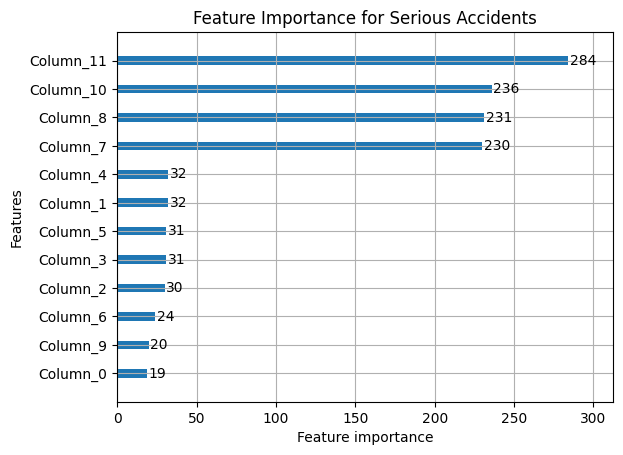

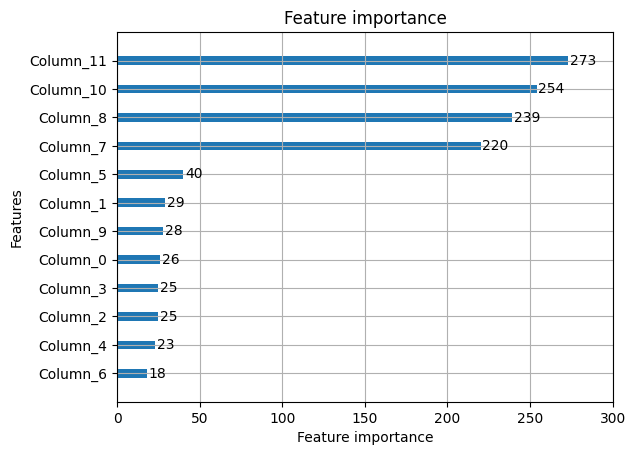

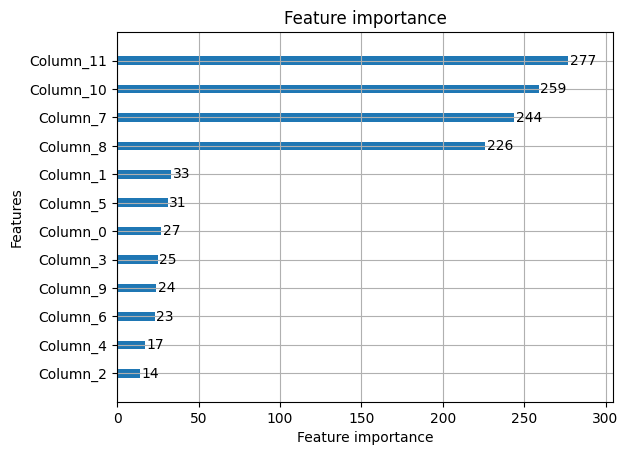

In [35]:
import matplotlib
from lightgbm import plot_importance

plot_importance(model.estimators_[0],height=0.3, title = 'Feature Importance for Serious Accidents')
plot_importance(model.estimators_[1],height=0.3)
plot_importance(model.estimators_[2],height=0.3)

In [115]:
#compute the mse error for both columns
mse_serious_accidents = mean_squared_error(merged_test_prediction_df['number_serious_accidents'].to_numpy(), y_test['number_serious_accidents'].to_numpy())
mse_slight_accidents = mean_squared_error(merged_test_prediction_df['number_slight_accidents'].to_numpy(), y_test['number_slight_accidents'].to_numpy())
mse_fatal_accidents = mean_squared_error(merged_test_prediction_df['number_fatal_accidents'].to_numpy(), y_test['number_fatal_accidents'].to_numpy())

print('MSE for serious accidents {}, MSE for slight accidents {}, MSE for fatal accidents {}'.format(mse_serious_accidents, mse_slight_accidents, mse_fatal_accidents))

MSE for serious accidents 0.11211046543898188, MSE for slight accidents 0.12883971991416276, MSE for fatal accidents 0.005573139126561891


In [116]:
import math 

rmse_serious_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_serious_accidents'].to_numpy(), y_test['number_serious_accidents'].to_numpy()))
rmse_slight_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_slight_accidents'].to_numpy(), y_test['number_slight_accidents'].to_numpy()))
rmse_fatal_accidents = math.sqrt(mean_squared_error(merged_test_prediction_df['number_fatal_accidents'].to_numpy(), y_test['number_fatal_accidents'].to_numpy()))

print('RMSE for serious accidents {}, RMSE for slight accidents {}, RMSE for fatal accidents {}'.format(rmse_serious_accidents, rmse_slight_accidents, rmse_fatal_accidents))

RMSE for serious accidents 0.3348290092554435, RMSE for slight accidents 0.35894250223979157, RMSE for fatal accidents 0.07465346024506761


In [117]:
from sklearn.metrics import r2_score

r2Score_serious_accidents = r2_score( y_test['number_serious_accidents'].to_numpy(), merged_test_prediction_df['number_serious_accidents'].to_numpy())
r2Score_slight_accidents = r2_score( y_test['number_slight_accidents'].to_numpy(), merged_test_prediction_df['number_slight_accidents'].to_numpy())
r2Score_fatal_accidents = r2_score(y_test['number_fatal_accidents'].to_numpy(), merged_test_prediction_df['number_fatal_accidents'].to_numpy())

print('r2_score for serious accidents {}, r2_score for slight accidents {}, r2_score for fatal accidents {}'.format(r2Score_serious_accidents, r2Score_slight_accidents, r2Score_fatal_accidents))


r2_score for serious accidents -0.09235876227356021, r2_score for slight accidents -0.07182304640414006, r2_score for fatal accidents -0.28659384060146254


In [174]:
for cluster_num in merged_test_prediction_df['cluster'].unique():
    cluster_filter = df['cluster'] == cluster_num
    merged_test_prediction_df.loc[merged_test_prediction_df['cluster'] == cluster_num, 'longitude'] = df.where(cluster_filter)['longitude'].mean()
    merged_test_prediction_df.loc[merged_test_prediction_df['cluster'] == cluster_num, 'latitude'] = df.where(cluster_filter)['latitude'].mean()

In [128]:
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,38962,Monday,11.3,0.0,0.0,19.700001,48.0,0,1,0
1,10612,Saturday,8.2,0.0,0.0,14.600000,155.0,0,1,0
2,14736,Sunday,19.5,0.0,0.0,17.700001,76.0,0,1,0
3,15153,Monday,16.4,0.0,0.0,13.800000,319.0,0,1,0
4,33884,Friday,8.0,1.8,0.0,16.900000,215.0,0,1,0


In [129]:
merged_test_prediction_df.to_csv('C:\\Users\\fiona.havelock\\Documents\\FinalProject\\workingdir\\merged_test_prediction_dfFinal.csv')

Text(0.5, 1.0, 'Serious Accidents Predicted (Orange) vs Actual (Blue) ')

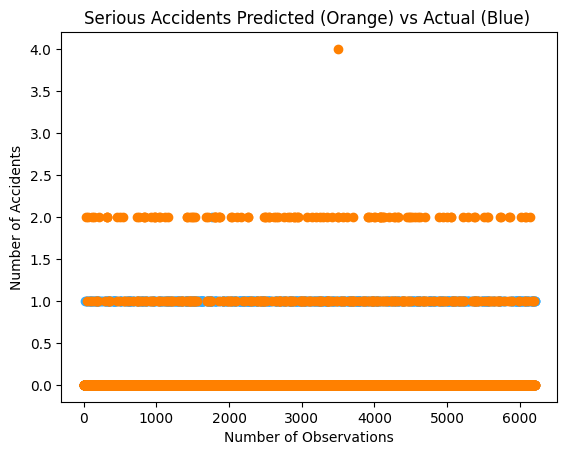

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(range(len(y_test['number_serious_accidents'])), y_test['number_serious_accidents'], color='#33adff')
ax.scatter(range(len(merged_test_prediction_df['number_serious_accidents'])), merged_test_prediction_df['number_serious_accidents'], color='#ff8000')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Number of Observations')
ax.set_title('Serious Accidents Predicted (Orange) vs Actual (Blue) ')

Text(0.5, 1.0, 'Slight Accidents Predicted (Orange) vs Actual (Blue) ')

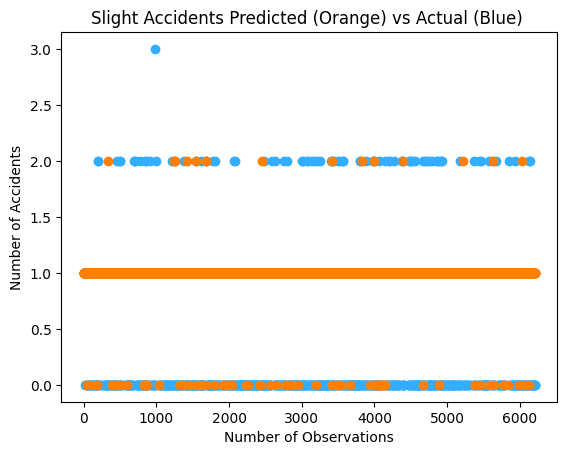

In [48]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.scatter(range(len(y_test['number_slight_accidents'])), y_test['number_slight_accidents'], color='#33adff')
ax.scatter(range(len(merged_test_prediction_df['number_slight_accidents'])), merged_test_prediction_df['number_slight_accidents'], color='#ff8000')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Number of Observations')
ax.set_title('Slight Accidents Predicted (Orange) vs Actual (Blue) ')

Text(0.5, 1.0, 'Fatal Accidents Predicted (Orange) vs Actual (Blue) ')

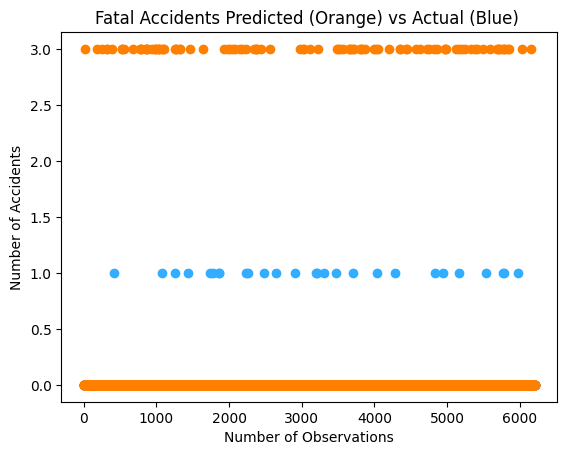

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(range(len(y_test['number_fatal_accidents'])), y_test['number_fatal_accidents'], color='#33adff')
ax.scatter(range(len(merged_test_prediction_df['number_fatal_accidents'])), merged_test_prediction_df['number_fatal_accidents'], color='#ff8000')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Number of Observations')
ax.set_title('Fatal Accidents Predicted (Orange) vs Actual (Blue) ')

In [177]:
import plotly.express as px

fig = px.scatter_mapbox(merged_test_prediction_df, lat="latitude", lon="longitude",
                        color = 'number_slight_accidents', color_continuous_scale='flare', zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(height=700)
fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of make_figure
        Received value: 'flare'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.
